In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
from sklearn.cluster import KMeans 


In [2]:
univ = pd.read_csv('/Users/users/Desktop/Universities (2).csv')

In [3]:
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [5]:
# Normalisation function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_univ_df = scaler.fit_transform(univ.iloc[:,1:])

<function matplotlib.pyplot.show(close=None, block=None)>

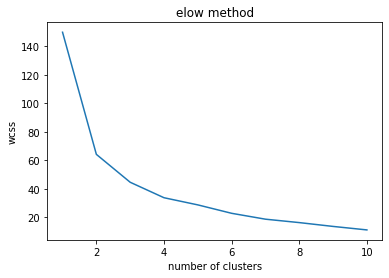

In [8]:
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_univ_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('elow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show

In [6]:
from sklearn.cluster import KMeans 
clusters_new = KMeans(4,random_state=234)
clusters_new.fit(scaled_univ_df)


KMeans(n_clusters=4, random_state=234)

In [7]:
clusters_new.labels_

array([2, 3, 0, 2, 0, 2, 2, 0, 2, 3, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0,
       0, 1, 2], dtype=int32)

In [8]:
univ['clusterid_new'] = clusters_new.labels_
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,3


In [9]:
univ.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1253.000000,77.700000,43.500000,12.90,22008.200000,86.900000
1,1,1061.500000,38.750000,70.000000,19.25,9953.000000,71.750000
2,2,1351.666667,89.444444,21.777778,11.00,33615.555556,93.777778
3,3,1360.000000,87.500000,34.500000,6.50,61133.000000,84.000000
